# The birthday problem

**Having a certain number of people, what's the probability that at least 2 of them are born on the same day, considering a year of 365 days? It of course depends on the amount of people! Let's see.**

According to theory of probability, the probability of two or more events to happen in sequence is equal to the product of the probability of each event: 

$$ P(A, B,...n) = P(A) \cdot P(B)\ ...\ \cdot  P(n) $$
 
If the probability of an event affects the probability of the following one, we have to use the conditional probability:

$$ P(A, B) = P(A) \cdot P(B|A) $$

So, the probability of two persons to be born on different days is equal to:

$$ \frac{365}{365} \cdot \frac{364}{365} = 0,99726 $$

Therefore, the probability that the two persons are born on the same day is equal to:

$$ 1 - \frac{365}{365} \cdot \frac{364}{365} = 0,00274 $$

### Experiment start
Import the modules numpy and matplotlib.pyplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Let's assume we have a group of 10 people. What's the probability that at least 2 of them are born in the same day?**

We start by setting a variable *people*, consisting of a sequence of 10 numbers, using the method *.arange()*.

In [2]:
people = np.arange(1,11)
people

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

We then store the number of days in a year into the variable *days* and the ratios into the result of a list comprehension (365/365 for the 1st person, 364/365 for the 2nd and so on) named *ratios*.

In [3]:
days = 365
ratios = [(days - (x-1))/days for x in people]

In order to determine the probability that all n persons are born on different days for each of the numbers stored in *people*, we have to calculate the product of each number in *ratios* for the number that follows it. We can achieve this task by using a while loop.

In [4]:
ratios_prob = []
y = 0
prod = 1

while y < len(ratios):
    prod = prod * ratios[y]
    ratios_prob.append(prod)
    y += 1

To determine the probability that at least 2 persons are born on the same day for each n stored in *people*, we simply subtract each element in *ratios_prob* from 1.

In [5]:
ratios_not_prob = [1 - x for x in ratios_prob]

Let's plot and see the results.

Text(0, 0.5, 'Probability')

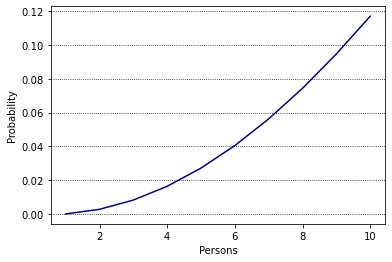

In [6]:
plt.plot(people, ratios_not_prob, color="darkblue")
plt.grid(color="black", linestyle=":", axis="y")
plt.xlabel("Persons")
plt.ylabel("Probability")

The probability that at least 2 persons are born on the same day in a group of 10 people is below 12%. In order to look at the data without building a dataframe, we can combine the built-in function *zip()* and *dict()*.

In [7]:
dict(zip(people, ratios_not_prob))

{1: 0.0,
 2: 0.002739726027397249,
 3: 0.008204165884781345,
 4: 0.016355912466550215,
 5: 0.02713557369979347,
 6: 0.040462483649111425,
 7: 0.056235703095975365,
 8: 0.07433529235166902,
 9: 0.09462383388916673,
 10: 0.11694817771107768}

We can draw a function that plots the probability of at least two persons to be born on the same day as the number of persons increases. The function will take 2 parameters: the number of persons and the number of days (default parameter = 365).

In [15]:
def same_birthday_prob(persons, days=365):
    people = np.arange(1,persons + 1)
    ratios = [(days - (x-1))/days for x in people]
    ratios_prob = []
    y = 0
    prod = 1

    while y < len(ratios):
        prod = prod * ratios[y]
        ratios_prob.append(prod)
        y += 1
    ratios_not_prob = [1 - x for x in ratios_prob]
    plt.plot(people, ratios_not_prob, color="darkblue")
    plt.grid(color="black", linestyle=":", axis="y")
    plt.xlabel("Persons")
    plt.ylabel("Probability") 

So, the probability distribution for 15 persons and 365 days is:

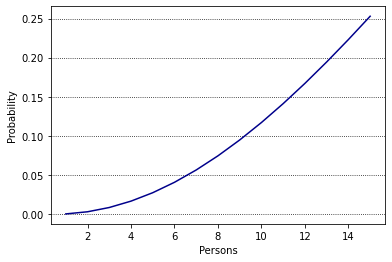

In [16]:
same_birthday_prob(15) 

The probability distribution for 25 persons and 180 days is:

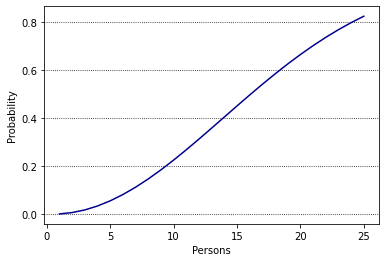

In [25]:
same_birthday_prob(25, days=180)

**Now, what is the lowest number of people that can assure we a 100% probability that at least 2 of them are born on the same day in a year?**

We can answer by using a double while loop, which iterates until an element stored in *ratios_not_prob* gets to 1.

In [11]:
days = 365
counter = 1
while ratios_not_prob.count(1) < 1:
    people = np.arange(1, counter)
    ratios = [(days - (x-1))/days for x in people]
    ratios_prob = []
    y = 0
    prod = 1
    while y < len(ratios):
        prod = prod * ratios[y]
        ratios_prob.append(prod)
        y += 1
    ratios_not_prob = [1 - x for x in ratios_prob]
    counter += 1

Let's plot the results, create the dictionary *results* and see the max value stored in it.

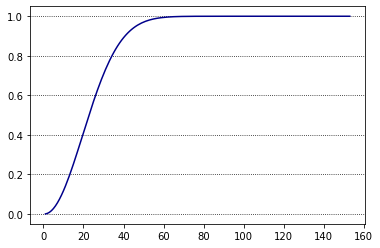

In [12]:
plt.plot(people, ratios_not_prob, color="darkblue")
plt.grid(color="black", linestyle=":", axis="y")

In [27]:
results = dict(zip(people, ratios_not_prob))
max(results)

153

Although the minimum number of persons we need to get a 100% probability that at least 2 of them are born on the same day of the year is 153, the line plot shows a stable probability of 1 starting from about 60 persons. How is that possible?

Let's take a closer look at the results.

In [61]:
for x, y in results.items():
    if x >= 60:
        print(x, ":", y)

60 : 0.994122660865348
61 : 0.9950887988052908
62 : 0.9959095748953655
63 : 0.9966043868309472
64 : 0.9971904789669755
65 : 0.9976831073124921
66 : 0.9980957046404045
67 : 0.9984400429793998
68 : 0.9987263912544141
69 : 0.9989636663083863
70 : 0.9991595759651571
71 : 0.9993207531773187
72 : 0.9994528806414568
73 : 0.9995608055560187
74 : 0.9996486444448149
75 : 0.9997198781738114
76 : 0.9997774374531652
77 : 0.999823779243739
78 : 0.9998609545813611
79 : 0.9998906683968511
80 : 0.9999143319493135
81 : 0.999933108508368
82 : 0.9999479529215796
83 : 0.9999596456898823
84 : 0.9999688221494433
85 : 0.9999759973260097
86 : 0.9999815869898157
87 : 0.9999859253976947
88 : 0.9999892801659155
89 : 0.9999918646738591
90 : 0.9999938483561236
91 : 0.9999953651998191
92 : 0.9999965207253437
93 : 0.9999973976932023
94 : 0.9999980607467152
95 : 0.9999985601708488
96 : 0.9999989349209019
97 : 0.9999992150512947
98 : 0.9999994236541013
99 : 0.9999995783990275
100 : 0.9999996927510721
101 : 0.9999997769

It's clear that the numbers between 60 and 152 have a very close to 1 probability, but it's still not 1! In other words, it's statistically very probable that at least 2 persons are born on the same day of the year in groups from 60 to 152 persons, but still not sure.

We can wrap the double while loop we wrote to get the minimum number of people that assures a 100% probability into a function that returns the minimum number of people needed to get a 100% probability considering a desired number of days.

In [105]:
def min_number_for_cert(days):
    ratios_not_prob = []
    counter = 1
    while ratios_not_prob.count(1) < 1:
        people = np.arange(1, counter)
        ratios = [(days - (x-1))/days for x in people]
        ratios_prob = []
        y = 0
        prod = 1
        while y < len(ratios):
            prod = prod * ratios[y]
            ratios_prob.append(prod)
            y += 1
        ratios_not_prob = [1 - x for x in ratios_prob]
        counter += 1
    return max(people)

So, for example, the minimum number of people to get a 100% probability that at least 2 persons are born on the same day in a period of 180 days is:

In [109]:
 min_number_for_cert(180)

104